In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x ,y = mnist["data"],mnist["target"]
(x.shape,y.shape)

((70000, 784), (70000,))

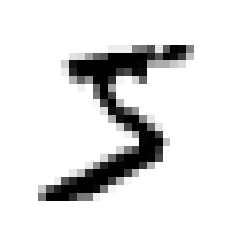

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ax1 = plt.figure()
some_digit = x[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = "binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
y = y.astype("int")

In [7]:
y[0]

5

In [8]:
x[0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
'''for n in range(0,10):
    some_digit = x[n]
    some_digit_image = some_digit.reshape(28,28)
    plt.subplot(2,5,n+1)
    plt.imshow(some_digit_image,cmap = "binary")
    #plt.axis("off")
    plt.show()'''

'for n in range(0,10):\n    some_digit = x[n]\n    some_digit_image = some_digit.reshape(28,28)\n    plt.subplot(2,5,n+1)\n    plt.imshow(some_digit_image,cmap = "binary")\n    #plt.axis("off")\n    plt.show()'

In [10]:
#create test set
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [11]:
#training a binary classifier
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [12]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train,y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [14]:
#performance measure

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits = 3,random_state =42 )
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds =y_train_5[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold= y_train_5[test_index]
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

c:\users\govind\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.95035
0.96035
0.9604


In [15]:
#now with cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv = 3,scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
#function always return zero that means  no data would match y_train_5
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,x,y= None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype = bool)

In [17]:
import numpy as np

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv = 3,scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [19]:
'''even with all 5 unidentified the accuracy is 90 % that  means there are only 10% data whose label is 5'''

'even with all 5 unidentified the accuracy is 90 % that  means there are only 10% data whose label is 5'

In [20]:
'''thats why accuracy is not used for classifiers and skewed data'''

'thats why accuracy is not used for classifiers and skewed data'

In [21]:
#confusion matrix
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [23]:
#if we get all correct prediction
y_pred_5 = y_train_5
confusion_matrix(y_train_5,y_pred_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
'''precision = tp/tp+fp'''
'''recall = tp/tp+fn'''

'recall = tp/tp+fn'

In [25]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
recall_score(y_train_5,y_train_pred)

0.8370879772350012


0.6511713705958311

In [26]:
#f1_score harmonic mean of precision and recall
#it would be high only if both precision and recall would be high

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [28]:
#precision recall trade off
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [31]:
#raising threshold decreases recall,increases precision


In [32]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv = 3,method = "decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

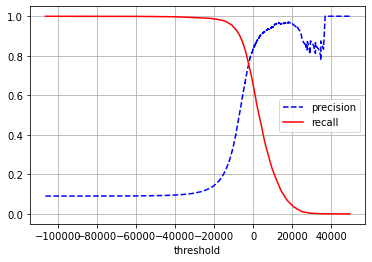

In [34]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "precision")
    plt.plot(thresholds,recalls[:-1],"r-",label = "recall")
    plt.legend()
    plt.xlabel("threshold")
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

Text(0, 0.5, 'precision')

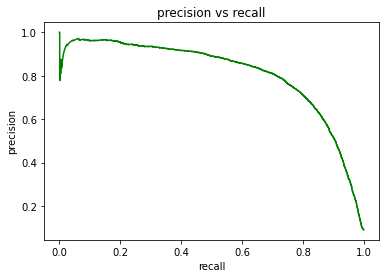

In [35]:
plt.plot(recalls,precisions,"g-",label = "precision")
plt.title("precision vs recall")
plt.xlabel("recall")
plt.ylabel("precision")

In [36]:
#np.argmax will give index of lowest value which surpass the condition
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [37]:
y_train_pred_90 = (y_scores>=threshold_90_precision)
print(precision_score(y_train_5,y_train_pred_90))
recall_score(y_train_5,y_train_pred_90)

0.9000345901072293


0.4799852425751706

# the ROC curve

In [38]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_train_5,y_scores)


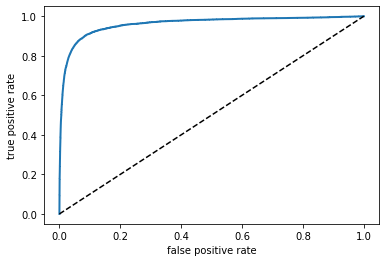

In [39]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
plot_roc_curve(fpr,tpr)
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

# let's now train a random classifier


In [41]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv =3,method = "predict_proba")

In [42]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [43]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)



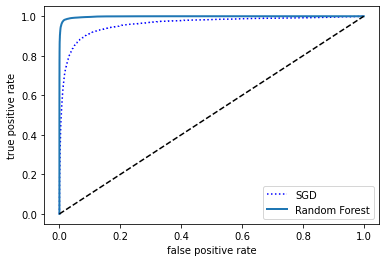

In [44]:
plt.plot(fpr,tpr,"b:",label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [45]:
'''comparing roc curves random forest is superior to SGD coz its roc curve is much closer to the top left corner and has greater auc'''

'comparing roc curves random forest is superior to SGD coz its roc curve is much closer to the top left corner and has greater auc'

In [46]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

# multiclass classification

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)
svm_clf.predict([some_digit])


In [ ]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

In [ ]:
svm_clf.classes_

In [ ]:
 np.argmax(some_digit_score)
some_digit_score

In [ ]:
svm_clf.classes_[5]


In [ ]:
#apply onevsrest or onevsone explicitly

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train,y_train)
ovr_clf.predict([some_digit])


In [ ]:
len(ovr_clf.estimators_)

In [ ]:
forest_clf.estimators_

In [ ]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf,x_train,y_train,cv = 3,scoring = "accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(float))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv= 3,scoring ="accuracy")


In [ ]:
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_max,cmap = plt.cm.gray )

In [ ]:
row_sums = conf_mx.sum(axis =1,keepdims = True)

In [ ]:
norm_comnf_mx = conf_mx/rom_sums

In [ ]:
np.fill_diagonal(norm_comnf_mx,0)

In [ ]:
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)

In [ ]:
cl_a,cl_b=3,5
x_aa = x_train[(y_train==cl_a)&(y_train_pred == cl_a)]
x_ab = x_train[(y_train==cl_a)&(y_train_pred == cl_b)]
x_bb = x_train[(y_train==cl_b)&(y_train_pred == cl_b)]
x_ba = x_train[(y_train==cl_b)&(y_train_pred == cl_a)]

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(221);plot_digits(x_aa[:25],images_per_row= 5)
plt.subplot(222);plot_digits(x_ab[:25],images_per_row= 5)
plt.subplot(223);plot_digits(x_bb[:25],images_per_row= 5)
plt.subplot(224);plot_digits(x_ba[:25],images_per_row= 5)

In [ ]:
#multioutput classification

In [ ]:
noise = np.random.randint(0,100,(len(x_train),784))
x_train_mod = x_train+noise

In [ ]:
noise 

In [ ]:
noise = np.random.randint(0,100,(len(x_test),784))
x_test_mod = x_test+noise

In [ ]:
y_train_mod = x_train
y_test_mod = y_train

In [ ]:
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit= knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)